# <center>HEALTH INSURANCE PREMIUM PREDICTION

![image](https://www.livemint.com/lm-img/img/2023/11/29/600x338/Screenshot_2023-11-29_180238_1701261164033_1701281051938.png)

### About the dataset

  Given dataset has 1338 rows × 7 columns. This data set provides us with information about the charges levied on insurance policies in the US and details of the insurance holder comprised of age, sex, BMI, no of children, whether smoker or not, and region. Here we are going to analyze each factor and check whether these are affecting the amount he/she has to pay

Health insurance premiums represent the recurring payments individuals or organizations make to secure coverage for medical expenses and healthcare services. These premiums are determined by various factors including the insured individual's age, gender, location, medical history, lifestyle choices, and the type and level of coverage selected. Additionally, factors such as the insurer's administrative costs, regulatory requirements, and anticipated healthcare utilization within the insured population also influence premium calculations. The goal of health insurance premiums is to spread the financial risk of healthcare expenses across a large pool of insured individuals, ensuring that funds are available to cover medical costs when needed. Premiums are typically paid on a monthly or annual basis and play a critical role in providing individuals and families with access to necessary medical care while helping to alleviate the financial burden associated with healthcare expenses.

In [1]:
#import python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#library for  and cross validation
from sklearn.model_selection import cross_val_score

#Standardize features
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler

#library for splitting data into train and test
from sklearn.model_selection import train_test_split

#import algorithms to use
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


from the above data we can infer that :
    
    Insurance premium varies from $1121 to $63770.Average premium is $13270. Here age group in consideration is from 18 to 64. 

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df["bmi_range"] = pd.cut(df.bmi, bins=3, labels=("low", "medium", "high"))
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_range
0,19,female,27.900,0,yes,southwest,16884.92400,low
1,18,male,33.770,1,no,southeast,1725.55230,medium
2,28,male,33.000,3,no,southeast,4449.46200,medium
3,33,male,22.705,0,no,northwest,21984.47061,low
4,32,male,28.880,0,no,northwest,3866.85520,medium


In [11]:
df["charges_range"] = pd.cut(df.charges, bins=3, labels=("cheap", "middle", "expensive"))
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_range,charges_range
0,19,female,27.900,0,yes,southwest,16884.92400,low,cheap
1,18,male,33.770,1,no,southeast,1725.55230,medium,cheap
2,28,male,33.000,3,no,southeast,4449.46200,medium,cheap
3,33,male,22.705,0,no,northwest,21984.47061,low,cheap
4,32,male,28.880,0,no,northwest,3866.85520,medium,cheap


In [12]:
k=df.groupby(['sex'])[['smoker','bmi_range']].value_counts()


### Visualisation

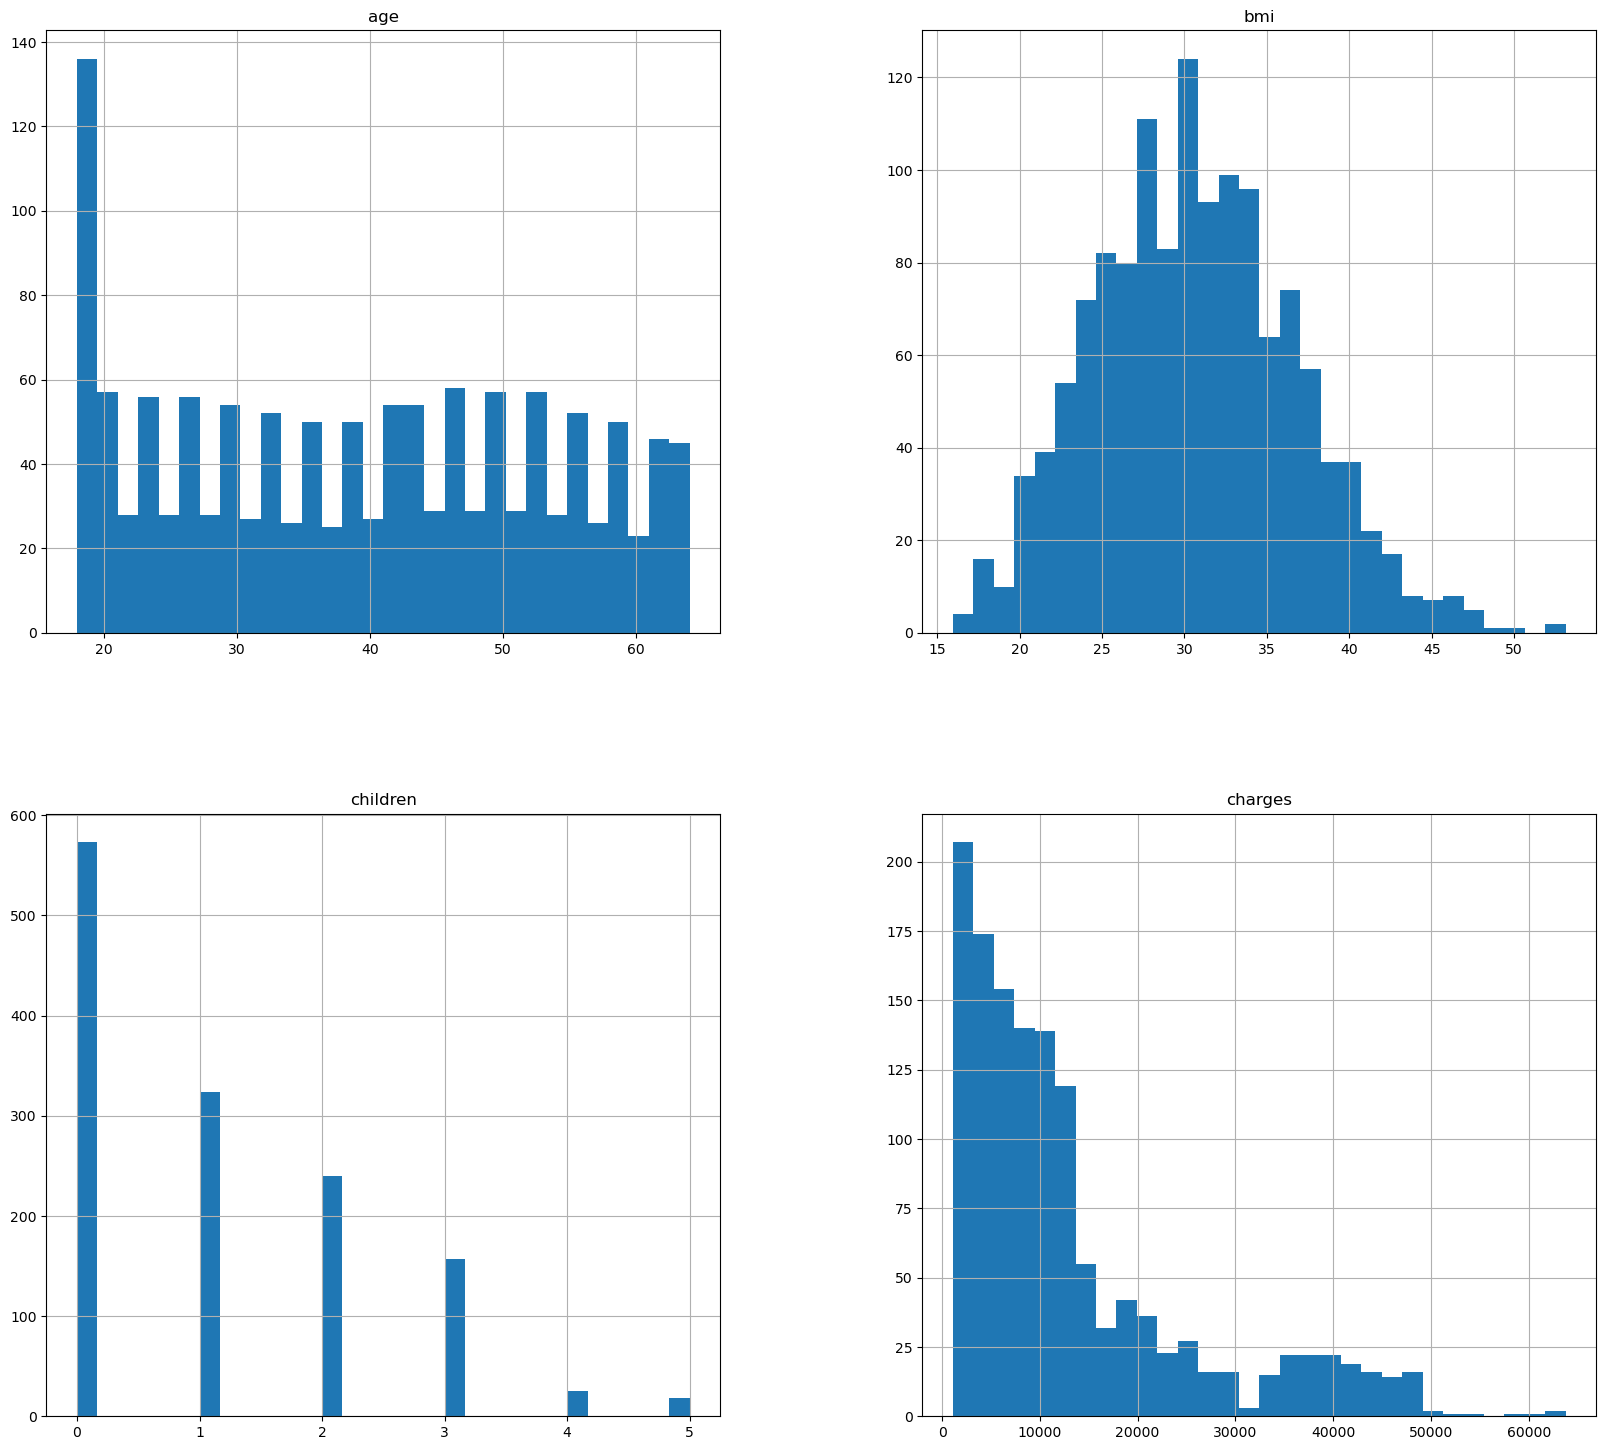

In [13]:
df.hist(bins=30, figsize=(20, 18))
plt.show()

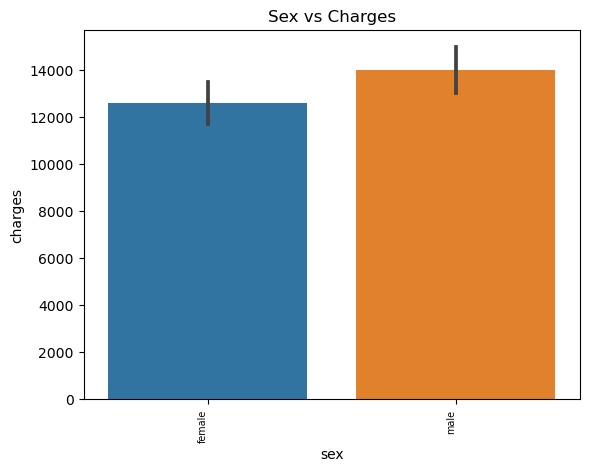

In [14]:
k=sns.barplot(x=df.sex,y=df.charges)
plt.setp(k.get_xticklabels(),rotation=90,horizontalalignment='right',fontsize='x-small')
plt.title('Sex vs Charges')
plt.show()

In [15]:
df.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [16]:
 k=df.groupby(['sex'])['charges'].sum()

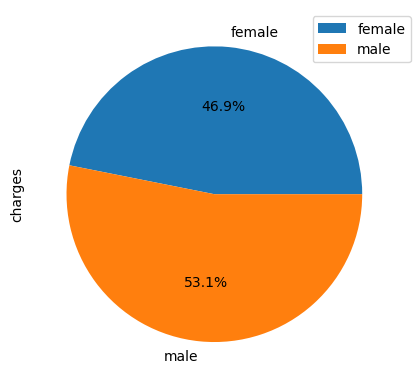

In [17]:
k.plot.pie(autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.05,1),loc='best')

Charges for male is slightly higher

Text(0.5, 1.0, 'age vs Charges')

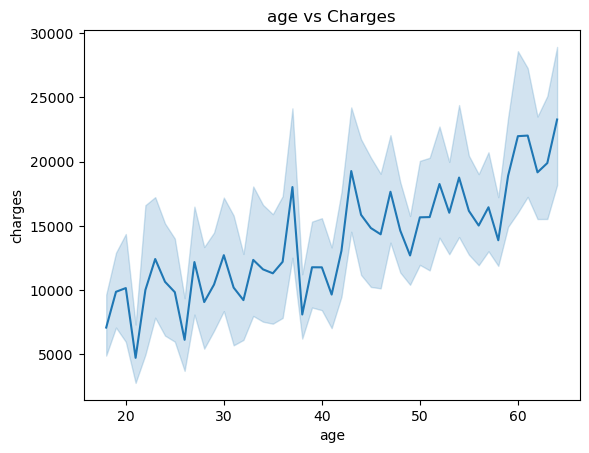

In [18]:
sns.lineplot(y='charges',x='age',data=df)
plt.title('age vs Charges')

Charges for insurance is increasing as age increasse, but not a perfect line which indicates that there are some other factors influencing the premium rate

Text(0.5, 1.0, 'No of children vs Charges')

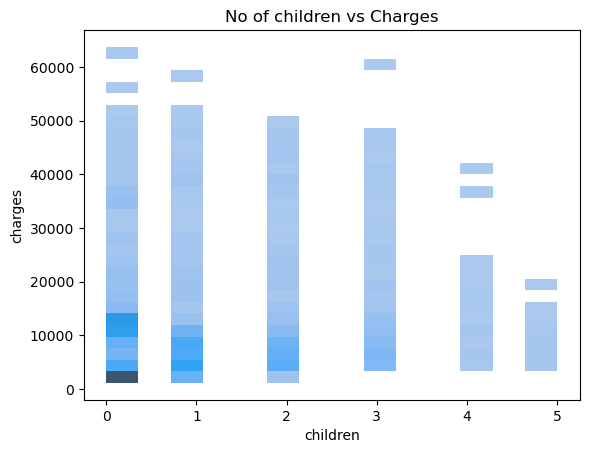

In [19]:
sns.histplot(y='charges',x='children',data=df)
plt.title('No of children vs Charges')

Text(0.5, 1.0, 'bmi vs Charges')

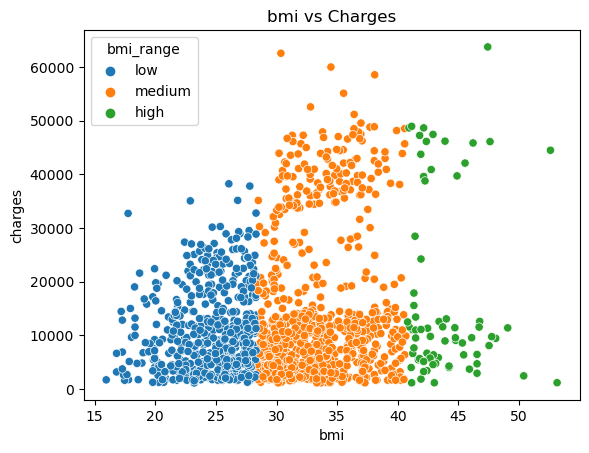

In [20]:
sns.scatterplot(y='charges',x='bmi',data=df,hue=df.bmi_range)
plt.title('bmi vs Charges')

Premium/charges  is higher for people with high bmi

Text(0.5, 1.0, 'region vs Charges')

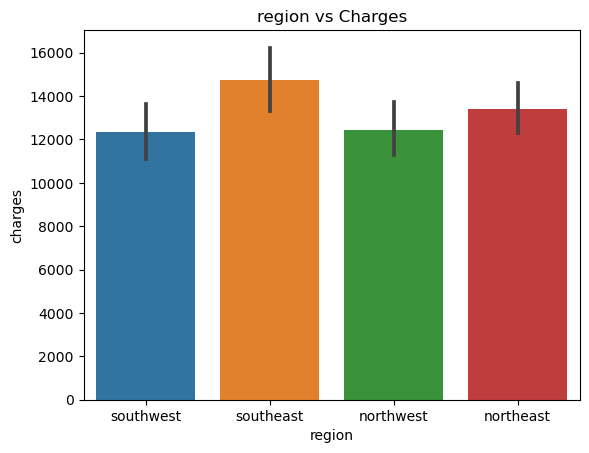

In [21]:
sns.barplot(y='charges',x='region',data=df)
plt.title('region vs Charges')

Charges are high in south east region

Text(0.5, 1.0, 'smoker vs Charges')

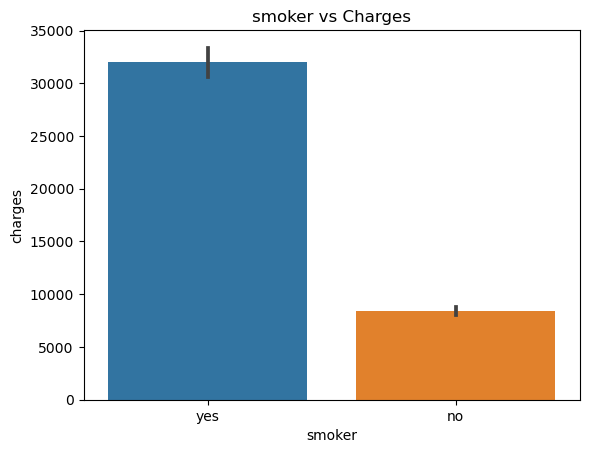

In [22]:
sns.barplot(y='charges',x='smoker',data=df)
plt.title('smoker vs Charges')

Charges for smokers are very high compared to that of  non smokers.

In [23]:
k=df.groupby(['sex'])[['smoker','bmi_range']].value_counts()
k

sex     smoker  bmi_range
female  no      medium       314
                low          208
        yes     low           57
                medium        52
        no      high          25
        yes     high           6
male    no      medium       303
                low          184
        yes     medium        95
                low           53
        no      high          29
        yes     high          11
Name: count, dtype: int64

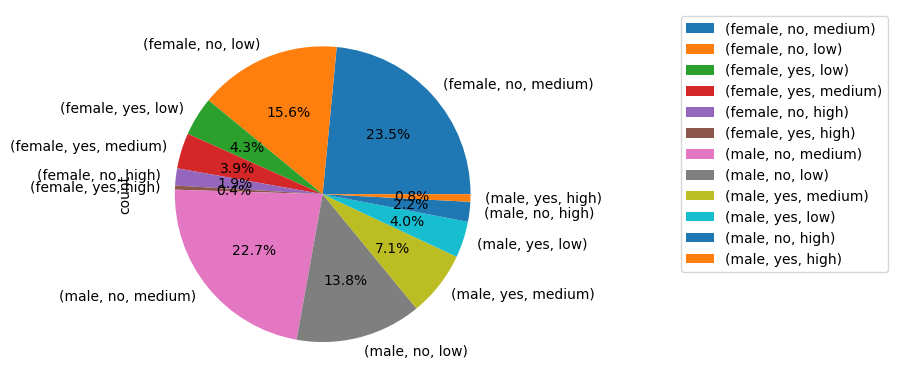

In [24]:
k.plot.pie(autopct='%1.1f%%')
plt.legend(bbox_to_anchor=(1.45,1),loc='best')

Interestingly, most of the insured people have a low/medium BMI range and are nonsmokers. That means :
either people with healthy lifestyles are the ones having health insurance the most or the premium is too high for people with a high BMI range to afford.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   age            1337 non-null   int64   
 1   sex            1337 non-null   object  
 2   bmi            1337 non-null   float64 
 3   children       1337 non-null   int64   
 4   smoker         1337 non-null   object  
 5   region         1337 non-null   object  
 6   charges        1337 non-null   float64 
 7   bmi_range      1337 non-null   category
 8   charges_range  1337 non-null   category
dtypes: category(2), float64(2), int64(2), object(3)
memory usage: 86.4+ KB


Text(0.5, 1.0, 'age vs bmi')

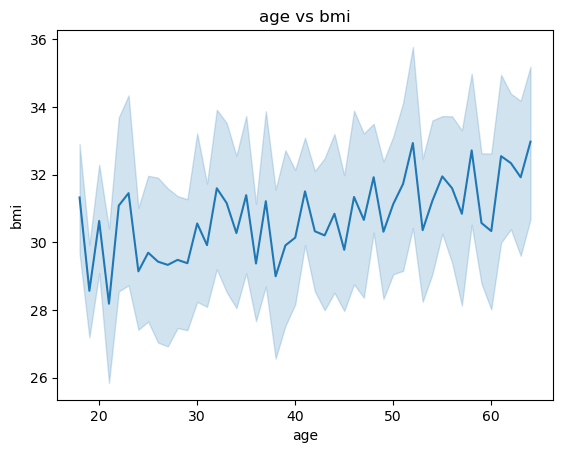

In [26]:
sns.lineplot(y='bmi',x='age',data=df)
plt.title('age vs bmi')

Inference:

BMI is not dependent on age . 

In [29]:
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['smoker']=le.fit_transform(df['smoker'])
df['region']=le.fit_transform(df['region'])


In [30]:
# Define mapping
mapping = {'low': 0, 'medium': 1, 'high': 2}

# Apply mapping using astype
df['bmi_range'] = df['bmi_range'].astype(str).map(mapping)

In [31]:
# Define mapping
mapping = {'cheap': 0, 'middle': 1, 'expensive': 2}

# Apply mapping using astype
df['charges_range'] = df['charges_range'].astype(str).map(mapping)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1337 non-null   int64  
 1   sex            1337 non-null   int64  
 2   bmi            1337 non-null   float64
 3   children       1337 non-null   int64  
 4   smoker         1337 non-null   int64  
 5   region         1337 non-null   int64  
 6   charges        1337 non-null   float64
 7   bmi_range      1337 non-null   int64  
 8   charges_range  1337 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 104.5 KB


<Axes: >

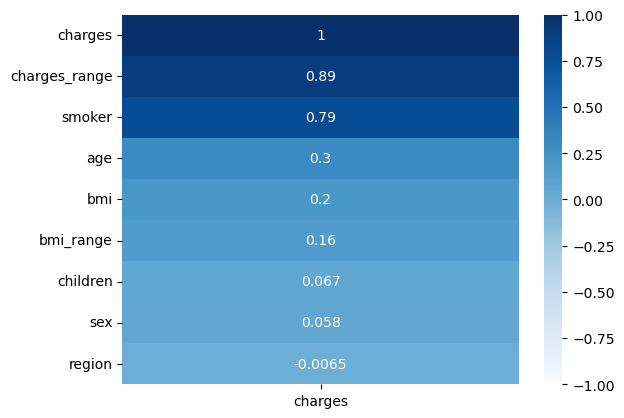

In [33]:
sns.heatmap(df.corr()[['charges']].sort_values(by='charges', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')

In [34]:
df.corr()[["charges"]].sort_values(by="charges", ascending=False)

,charges
charges,1.000000
charges_range,0.891869
smoker,0.787234
age,0.298308
bmi,0.198401
bmi_range,0.162230
children,0.067389
sex,0.058044
region,-0.006547


In [69]:
x=df[['smoker','age','bmi','bmi_range','children']].values
y=df[['charges']].values


As charges_range is something which is cut out of charges, we are not taking charges_range into consideration

In [70]:
#scaling the data set

sc=StandardScaler()
x= sc.fit_transform(x)

#split into train and test set

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=22)

In [71]:
models = { 
    "LinearRegression": LinearRegression(), 
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "LinearSVR":LinearSVR(), 
    "DecisionTreeRegressor":DecisionTreeRegressor(), 
    "GradientBoostingRegressor":GradientBoostingRegressor(), 
    "AdaBoostRegressor":AdaBoostRegressor(), 
    "RandomForestRegressor":RandomForestRegressor() 
}

### Crossvalidation:

In [85]:
for name, model in models.items(): 
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1) 
    print("cross validation model : {}".format(name)) 
    rmse = np.sqrt(-scores) 
    rmse_average = np.mean(rmse) 
    print("AVERAGE RMSE: ",rmse_average) 
    print("*"*100)


cross validation model : LinearRegression
AVERAGE RMSE:  6061.370999789015
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  6061.370537880835
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  6061.373985998995
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  17079.877715825038
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  6280.31102124731
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  4520.393936030569
************************************************************

#### RMSE value is less for GradientBoostingRegressor, so we are selecting this model.

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [87]:
model=GradientBoostingRegressor()

In [88]:
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [89]:
training_score = model.score(x_train, y_train)*100
training_score

90.572557845937

In [90]:
testing_score = model.score(x_test, y_test)*100
testing_score

84.91878367806083

In [91]:
R2_score=r2_score(y_test,model.predict(x_test))*100
R2_score

84.91878367806083

In [92]:
mae=mean_absolute_error(y_test,model.predict(x_test))
mae

2735.416287552365

In [93]:
mse=mean_squared_error(y_test,model.predict(x_test))
mse

25371064.912367713

In [94]:
y_pred = model.predict(x)

In [95]:
PREDICTION = pd.DataFrame(zip(y, y_pred), columns=('ACTUAL', 'PREDICTED'), dtype=float)
PREDICTION

,ACTUAL,PREDICTED
0,16884.92400,18161.699445
1,1725.55230,4642.289638
2,4449.46200,7025.270877
3,21984.47061,13779.914897
4,3866.85520,4450.249991
...,...,...
1332,10600.54830,11024.722490
1333,2205.98080,2767.630568
1334,1629.83350,2713.131198
1335,2007.94500,2438.360295


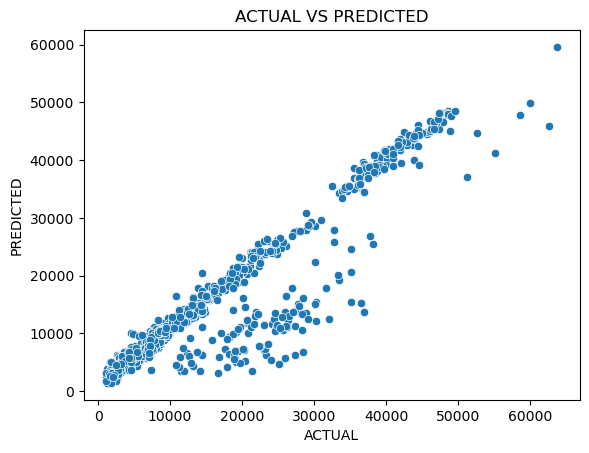

In [96]:
sns.scatterplot(data=PREDICTION, x='ACTUAL',y='PREDICTED')
plt.title('ACTUAL VS PREDICTED')
plt.show()

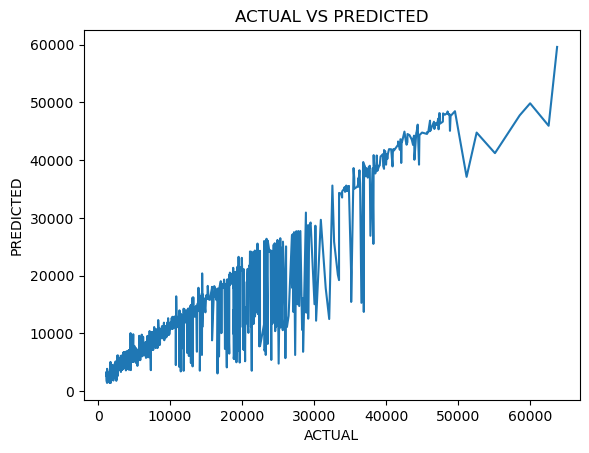

In [97]:
sns.lineplot(data=PREDICTION, x='ACTUAL',y='PREDICTED')
plt.title('ACTUAL VS PREDICTED')
plt.show()

### Conclusion:

#### In this analysis,GradientBoostingRegressor, we did extensive analysis of input data and were able to achieve Test Accuracy of 84.91%